# **Causal inference with observational data**
# Interrupted Time Series synthetic control
* Have repeated overvations of the outcome over time? (시계열인가?)
 * yes
* Have a control time series data from a non-treated unit? (대조군이 있는가?)
 * yes
* More than a handful of obs before and after intervention? (이벤트 후에 데이터 많은가?)
 * yes

$\rightarrow$ 대조군이 있는 시계열 접근 방법  
$\rightarrow$ Interrupted Time Series analysis 에서 대조군이 있는 경우 적용할 수 있는 방법 

## Interrupted Time Series(ITS) analysis 
~ 중단된 시계열 분석, 준실험적 시계열 분석

* 분석의 목적
 * intervension, interruption 전 후 유의미한 변화가 있는가 ($\leftrightarrow$ 일반 시계열 목적 : 예측)
   * 변화
     * level
     * slope
     * both
* 종류
 * Single
 * Comparative

* simple case(single case)

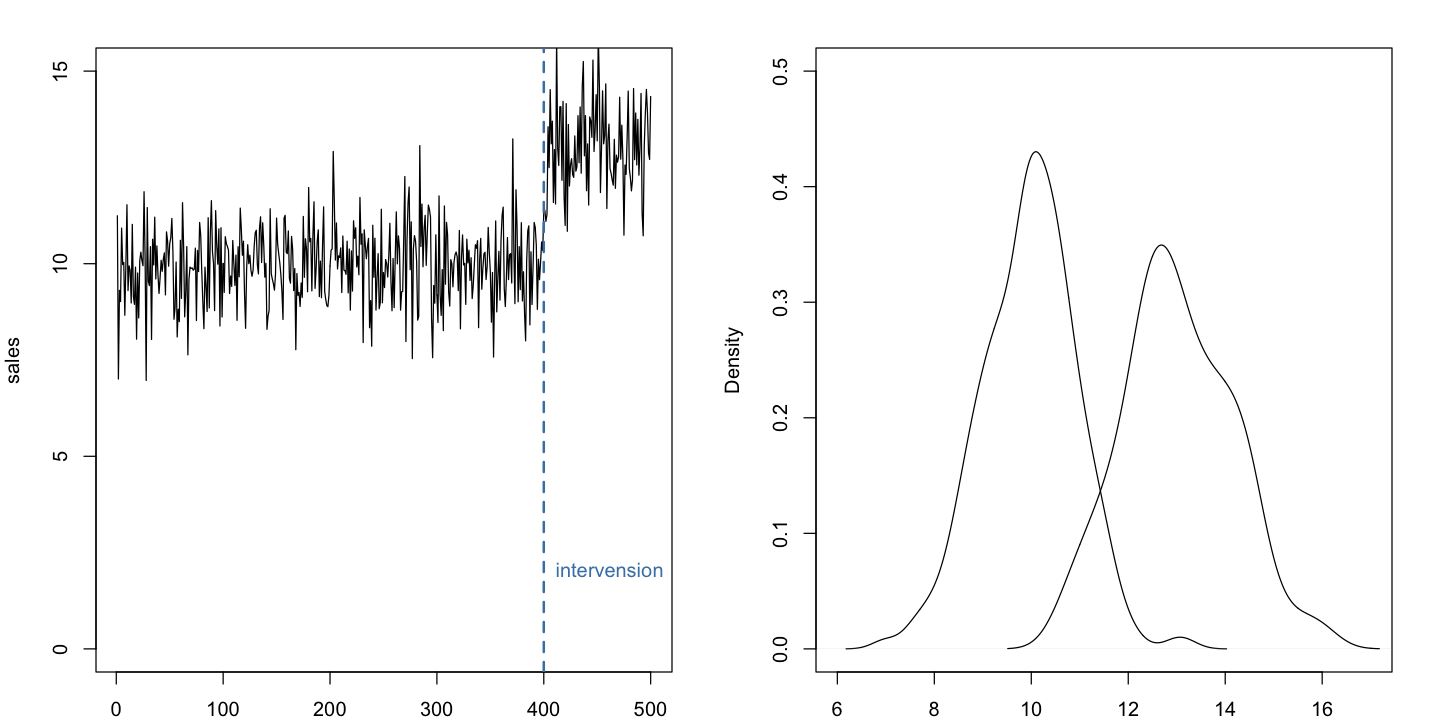

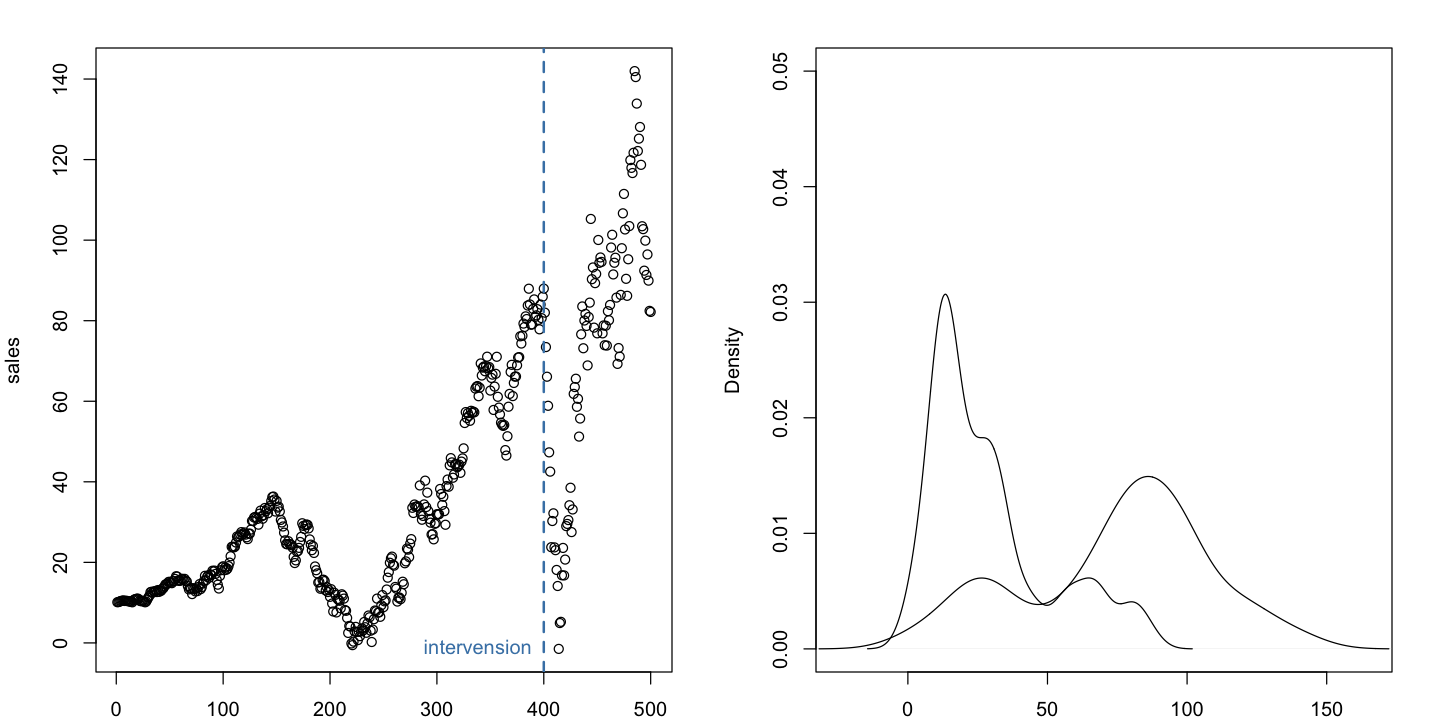

In [1]:
x <- 1:500
y1 <- 10+rnorm(400)
y2 <- 13+rnorm(100)
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2),mar = c(2,4,2,2))
plot(x,c(y1,y2),type='l',ylim=c(0,15),ylab="sales",xlab="time")
abline(v=400,lwd=2,lty=2,col="steelblue")
text(pos=4,400,2,"intervension",col="steelblue")
plot(density(y1),xlim=c(6,17),main="",xlab="x",ylim=c(0,.5))
lines(density(y2))

y_ar = rep(10,501)
for(t in 2:401){
    y_ar[t]=1.005*y_ar[t-1]+rnorm(1,0,t/100)
}
for(t in 402:501){
    y_ar[t]=(1.002*y_ar[t-1]+rnorm(1,0,t/50))
}

plot(y_ar[-1],ylab="sales")
abline(v=400,lwd=2,lty=2,col="steelblue")
text(pos=2,400,min(y_ar),"intervension",col="steelblue")
plot(density(y_ar),type='n',main="",xlab="x",ylim=c(0,0.05))
lines(density(y_ar[2:401]))
lines(density(y_ar[402:501]))




**위 그래프$(2 \times 2)$에서 데이터가 [1,1:2] 와 같다면 일반적인 t-검정을 할 수 있지만, 실제데이터는 [2,1:2] 와 같이 자기상관과 정상성이 존재**  
**$\therefore$ ITS analysis 를 적용해야함**

### 방법론
#### Single
1. 시계열 예측 신뢰구간으로 intervension 이후 변화가 유의미한지 판단
2. etc

#### Comparative
1. Synthetic control
2. Bayesian structural time series 
3. etc

## **Comparative**

## Synthetic Control Methods for Comparative

: 처리되지 않은 다른 unit의 가중합으로 counterfactual outcome을 추정하고 추정된 값을 통한 유효성 검정

### Model
$Y_{it}^N$ intervension 이 없었다는 가정의 결과(counterfactual outcome),  
$i$ 는 unit($i=1,\ldots,J+1$), $t$ 는 time($t=1,\ldots,T$)  
$T_0$ 는 intervension 시점 ($1<T_0 < T$)  
$Y_{it}^I$ intervension 이후 관측값  
만약 intervension의 효과가 없다면 $Y_{it}^I=Y_{it}^N$

Let $\alpha_{it}=Y_{it}^I-Y_{it}^N$  
$$Y_{it}=Y_{it}^N + \alpha_{it}D_{it}$$

\begin{equation}
  D_{it}=\begin{cases}
    1, & \text{if $i=1$ and $t>T_0$}\\
    0, & \text{otherwise}
  \end{cases}
\end{equation}

For $t>T_0$,우리는 이때 $\alpha_{1T_0+1},\cdots,\alpha_{1T}$ 를 추정하고 싶음
$$\alpha_{1t}=Y_{1t}^I-Y_{1t}^N=Y_{1t}-Y_{1t}^N$$
$\alpha_{1t}$:intervension 이 없다는 가정하의 결과(counterfactual outcome)와 intervension 이후 관측값의 차이

$Y_{1t}=Y_{1t}^I$ 는 관측값이고, 추정이 필요한 값은 $Y_{1t}^N$

$Y_{it}^N$ 을 factor model 가정
$$Y_{it}^N = \delta_t + \theta_t \mathbf Z_i + \lambda_t \mu_i + \varepsilon_{it},$$
$\mathbf Z_i$ is vector of observed covariates (not affected by the intervention) 

Consider vector of weights $\mathbf{W}=(w_2,\ldots,w_{J+1})'$ 이때 $w_j>0, w_2+\cdots+w_{J+1}=1$   
$$\sum^{J+1}_{j=2}w_jY_{jt}=\delta_t+\theta_t\sum^{J+1}_{j=2}w_j\mathbf Z_j + \lambda_t \sum^{J+1}_{j=2}w_j\mu_j+\sum^{J+1}_{j=2}w_j\varepsilon_{jt}$$
Suppose that there are $(w^*_2,\ldots,w^*_{J+1})$ such that  

$$\sum^{J+1}_{j=2}w_j^*Y_{j1}=Y_{11}, \sum^{J+1}_{j=2}w_j^*Y_{j2}=Y_{12},\cdots$$

\begin{align}
\sum^{J+1}_{j=2}w_j^*Y_{j1}=Y_{11},&\sum^{J+1}_{j=2}w_j^*Y_{j2}=Y_{12},&\cdots \\
\sum^{J+1}_{j=2}w_j^*Y_{j1}=Y_{13},&\text { and      } \sum^{J+1}_{j=2}w^*_j\mathbf Z_j=\mathbf Z_1 &
\end{align}




$$\hat \alpha_{1t}=Y_{1t}-\sum_{j=2}^{J+1}w^*_jY_{jt}$$
즉, $Y_{1t}^N$ 은 나머지 유닛들의 가중평균형태로 나타낼 수 있음  
$\therefore$ 적절한 $w^*_j$,where $(j=2,\ldots,J+1)$ 구하면 $\hat \alpha_{1t}$ 을 구할 수 있음 

### Estimate 
$\mathbf W = (w_2,\ldots,w_{J+1})'$ with $w_j \geq 0$ for $j=2,\ldots,J+1$, $\sum^{J+1}_{j=2}w_j=1$


Choose $\mathbf W$ to minimize $||X_1-X_0\mathbf W||$  
$X_1=(\mathbf Z_1',\bar Y^{K_1}_1,\ldots,\bar Y^{K_M}_1)$ : unit=1 의 특성벡터  
$X_0=(\mathbf Z_j',\bar Y^{K_1}_j,\ldots,\bar Y^{K_M}_j)$ : j번째 유닛의 특성벡터



### Inference 
추정된 $\alpha_{1t}$ 가 유의미한가에 대한 검정  
효과가 없다면 $\alpha_{1t}=0$ for every $t$

Albero(2010) adopt ratio of post/pre MSPE(Mean Squar Preiction Error) ratio



## Application

In [13]:
#install.packages('Synth')
library('Synth')
library('tidyverse')
data("basque")
#EDA
dim(basque) #774*17
basque[1:10,]

#dataset <- tbl_df(basque) %>% select(year,school.illit, school.prim, school.med,school.high,school.post.high,invest)%>%filter(year,)

dataprep.out <- dataprep(foo = basque,
 predictors = c("school.illit", "school.prim", "school.med",
 "school.high", "school.post.high", "invest"),
 predictors.op = "mean", # the operator
 time.predictors.prior = 1964:1969, #the entire time frame from the #beginning to the end
 special.predictors = list(
 list("gdpcap", 1960:1969, "mean"),
 list("sec.agriculture", seq(1961,1969,2),"mean"),
 list("sec.energy",seq(1961,1969,2),"mean"),
 list("sec.industry", seq(1961,1969,2),"mean"),
 list("sec.construction", seq(1961,1969,2),"mean"),
 list("sec.services.venta", seq(1961,1969,2),"mean"),
 list("sec.services.nonventa",seq(1961,1969,2),"mean"),
 list("popdens", 1969, "mean")),
 dependent = "gdpcap", # dv
 unit.variable = "regionno",#identifying unit numbers
 unit.names.variable = "regionname",#identifying unit names
 time.variable = "year",#time-periods
 treatment.identifier = 17,#the treated case
 controls.identifier = c(2:16, 18),#the control cases; all others #except number 17
 time.optimize.ssr = 1960:1969,#the time-period over which to optimize
 time.plot = 1955:1997)#the entire time period before/after the treatment


synth.out = synth(data.prep.obj = dataprep.out, method = "BFGS")
gaps = dataprep.out$Y1plot-(dataprep.out$Y0plot%*% synth.out$solution.w)
dim(gaps)
gaps

[1] 774  17

regionno,regionname,year,gdpcap,sec.agriculture,sec.energy,sec.industry,sec.construction,sec.services.venta,sec.services.nonventa,school.illit,school.prim,school.med,school.high,school.post.high,popdens,invest
1,Spain (Espana),1955,2.354542,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1956,2.480149,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1957,2.603613,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1958,2.637104,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1959,2.669880,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1960,2.869966,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1961,3.047486,19.54,4.71,26.42,6.27,36.62,6.44,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1962,3.273279,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1963,3.493502,19.05,4.31,26.05,6.83,38.00,5.77,NA,NA,NA,NA,NA,NA,NA
1,Spain (Espana),1964,3.600114,NA,NA,NA,NA,NA,NA,2863.278,18679.1,1064.246,359.7457,212.1434,NA,18.36018



X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.008864596 

solution.v:
 0.02332635 0.001290771 2.90559e-05 2.0011e-06 2.16166e-05 0.009229595 0.03291054 0.2695968 0.02467952 0.2390636 0.0005058444 1.541e-06 0.05297116 0.3463716 

solution.w:
 2.17e-08 3.92e-08 6.2e-08 3.11e-08 3.34e-08 3.837e-07 3.34e-08 3.98e-08 0.8508288 1.018e-07 2.74e-08 4.89e-08 0.1491702 3.73e-08 7.51e-08 8.38e-08 



[1] 43  1

,17
1955,0.150249236
1956,0.091695535
1957,0.037180500
1958,-0.005973833
1959,-0.045885889
1960,-0.093001893
1961,-0.158710919
1962,-0.088673095
1963,-0.025008688
1964,0.040403080


In [16]:
basque[85:89, 1:4]

,regionno,regionname,year,gdpcap
85,2,Andalucia,1996,5.995930
86,2,Andalucia,1997,6.300986
87,3,Aragon,1955,2.288775
88,3,Aragon,1956,2.445159
89,3,Aragon,1957,2.603399
